In [36]:
import requests
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [41]:
params = {
  "engine": "google_trends",
  "data_type": "TIMESERIES",
  "date": "today 12-m",
  "api_key": "eecb50b3d1430be3cb8187afb5d46fea26d2c3e4355b82de28d503b1a8aa2e8e"
}

In [42]:
def get_time_series(query): 
    params["q"] = query
    r = requests.get(url = "https://serpapi.com/search.json", params = params)

    my_json = r.json()

    timeline_data = my_json["interest_over_time"]["timeline_data"]

    dates = []
    value = []
    for item in timeline_data: 
        dates.append(item['date'])
        value.append(item['values'][0]['value'])

    dates_convert = []
    for date in dates: 
        date = date.replace("\u2009","")
        curr_date = date.split("–")
        year = curr_date[1].split(",")[1]
        year = year.split(" ")[1]
        month_day = curr_date[0].split(",")[0]
        dates_convert.append(month_day + " " + year)

    return dates_convert, value

In [43]:
dates, freq = get_time_series('Britney Spears')

In [44]:
df = pd.DataFrame({'Date': dates, 'total': freq})

In [45]:
df['Date'] = pd.to_datetime(df['Date'])

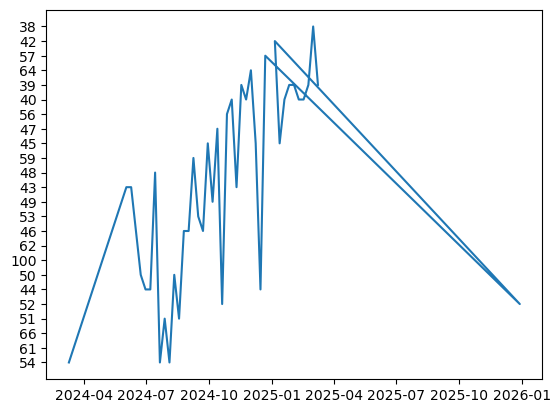

In [46]:
plt.plot(df['Date'], df['total'])